# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> I chose the Prosper Loan dataset. It contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.The dataset can be downloaded here(https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv%26amp;sa%3DD%26amp;ust%3D1581581520570000&sa=D&source=editors&ust=1662186487887315&usg=AOvVaw09ps6UoDCiCiiB2Krgdt9s). This data dictionary(https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1662186487888019&usg=AOvVaw1qU4pbaj5p67dHlIjMxNTq) explains the variables in the data set.


## Preliminary Wrangling


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
#load dataset
data = pd.read_csv('prosperLoanData.csv')
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
#check the dimension of the dataset
data.shape

(113937, 81)

In [202]:
#check the type of columns and other info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94844 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           94844 non-null  object 
 1   ListingNumber                        94844 non-null  int64  
 2   ListingCreationDate                  94844 non-null  object 
 3   CreditGrade                          18508 non-null  object 
 4   Term                                 94844 non-null  int64  
 5   LoanStatus                           94844 non-null  object 
 6   ClosedDate                           41644 non-null  object 
 7   BorrowerAPR                          94844 non-null  float64
 8   BorrowerRate                         94844 non-null  float64
 9   LenderYield                          94844 non-null  float64
 10  EstimatedEffectiveYield              76216 non-null  float64
 11  EstimatedLoss              

In [15]:
#work on columns with missing values
data = data.dropna(subset=['BorrowerState', 'Occupation', 'EmploymentStatus', 'DebtToIncomeRatio', 'EmploymentStatusDuration'])
data['Occupation'].isnull().sum()

0

In [7]:
#fill rows missing prosper score values with the mean
data['ProsperScore'].fillna(6.0, inplace = True)

In [16]:
#convert Incomerange into an ordered category
Income_classes = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed', 
                'Not displayed']

Incomerange = pd.api.types.CategoricalDtype(ordered=True, categories=Income_classes)
data['IncomeRange'] = data['IncomeRange'].astype(Incomerange);

In [17]:
#convert Loan status into an ordered category
Loan_classes = ['Current', 'Completed', 'FinalPaymentProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
               'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Chargedoff', 'Cancelled']

LoanStatus = pd.api.types.CategoricalDtype(ordered=True, categories=Loan_classes)
data['LoanStatus'] = data['LoanStatus'].astype(LoanStatus);

In [18]:
# function to plot bar plot with seaborn
def countplot(data, xvar):
    #base color
    base_color = sb.color_palette()[3]
    
    #plot dimensions
    plt.figure(figsize=(10, 6))
    
    #plot
    sb.countplot(data = data, x = xvar, color = base_color,  order = data[xvar].value_counts(ascending = True).index);
    
    #add x label
    plt.xlabel(xvar.title(), fontsize = 8, weight = 'bold')
    
    #add y label
    plt.ylabel('Frequency'.title(), fontsize = 8, weight = 'bold')

### What is the structure of your dataset?

> My dataset has 113937 rows and 81 columns.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in my dataset is to find out what affects loan original amount, borrowerApr and loan outcome status

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in this dataset that will help support my investigation include:
LoanStatus,
IsBorrowerHomeOwner,
Term,
LoanOriginalAmount,
IncomeRange,
BorrowerAPR,
LoanStatus,
LenderYield,
ProsperScore,
EmploymentStatus,
Occupation,
BorrowerRate,
DebtToIncomeRatio.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


 ## Distribution Of Variables

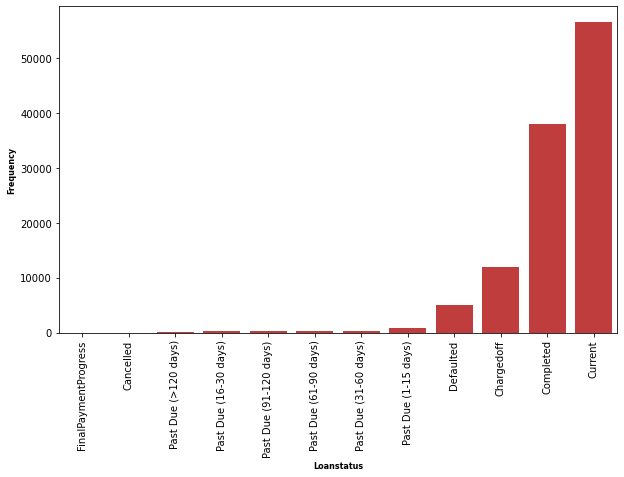

In [51]:
#distribution of loan status
countplot(data, 'LoanStatus')
plt.xticks(rotation =90);

## Observation

From the plot above we can see that most loans in the dataset are either current(still being paid off) or completed(the loan repayment has been completed). Beneath those two top categories we can see that the next two highest loan status categories are charged off(the loan has been written off as a loss but the borrower is still obligated to pay) and defaulted(the borrower has defaulted on payment).

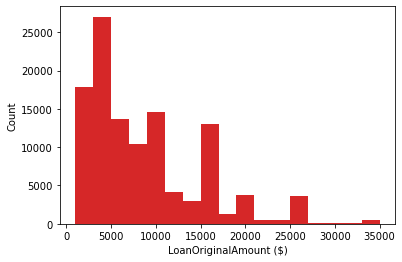

In [7]:
#distribution of LoanOriginalAmount
base_color = sb.color_palette()[3]
plt.hist(data = data, x = 'LoanOriginalAmount', bins = 17, color = base_color);
plt.xlabel('LoanOriginalAmount ($)');
plt.ylabel('Count');

## Observation

From the plot above we can see that the LoanOriginalAmount variable is heavily right skewed. Majority of borrowers got loans between 0 and 5000 while the highest loan given appears to be in the region of 35000

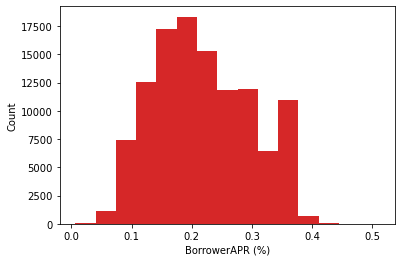

In [8]:
#distribution of BorrowerAPR
base_color = sb.color_palette()[3]
plt.hist(data = data, x = 'BorrowerAPR', bins = 15, color = base_color);
plt.xlabel('BorrowerAPR (%)');
plt.ylabel('Count');

## Observation

From the plot above we can see that the borrowerAPR variable has a largely unimodal distribution with some peaks also on the right side of the plot.

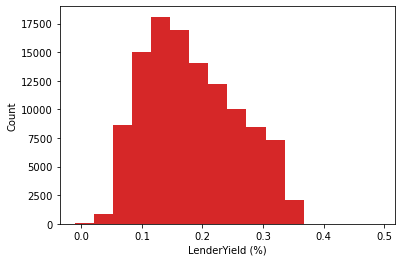

In [9]:
#distribution of LenderYield
base_color = sb.color_palette()[3]
plt.hist(data = data, x = 'LenderYield', bins = 16, color = base_color);
plt.xlabel('LenderYield (%)');
plt.ylabel('Count');

## Observation

From the plot above we can see that the Lenderyield variable has a largely unimodal distribution with declining peaks
and troughs following through to the end on the plot.

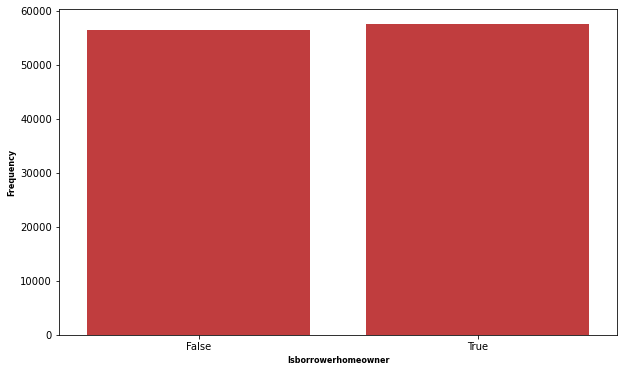

In [10]:
#distribution of IsBorrowerHomeowner
countplot(data, 'IsBorrowerHomeowner')

## Observation

From the plot above we can see that the IsBorrowerHomeOwner variable is largely evenly distributed between the two categories(False and True) with the True category slightly edging the False variable on the y axis(frequency).

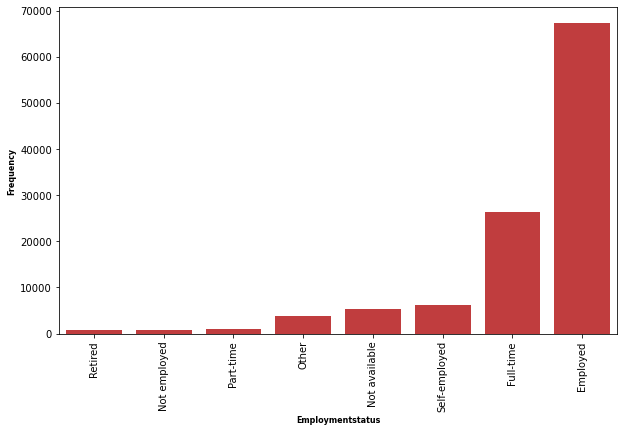

In [11]:
#distribution of Employmentstatus
countplot(data, 'EmploymentStatus')
plt.xticks(rotation =90);

## Observation

From the plot above we can infer that majority of Borrowers in this dataset are either employed or in some form of full-time work. The next highest employment status category is the self employed status.

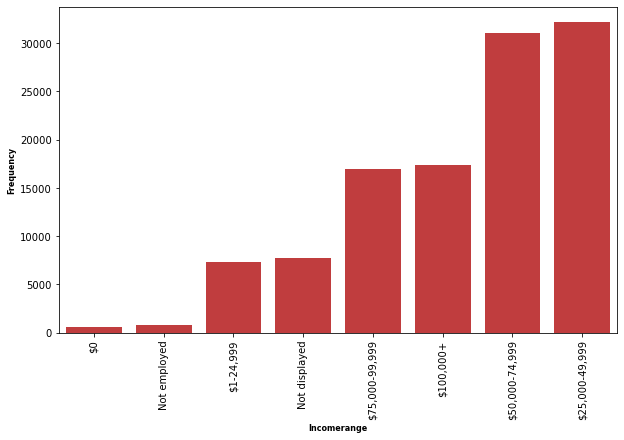

In [35]:
#distribution of Incomerange
countplot(data, 'IncomeRange')
plt.xticks(rotation =90);

## Observation

From the plot above we can see that the most frequent Income range in this dataset is the 25,000 - 49,999 category, it is closely followed by the 50,000 - 74,999 income range. The two other most frequently occuring income ranges are 100,000+ and
75,000 - 99,999. The income ranges of 1 - 24,999 and those which are not displayed are the other frequently occuring categories(occuring over 5000 times).

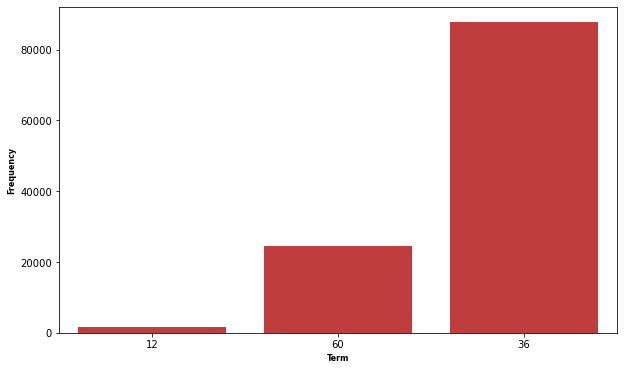

In [13]:
#distribution of Term
countplot(data, 'Term')

## Observation

From the plot above we can clearly see that the Term variable's most occuring category is 36 months(occuring over 80,000 times), it is followed by 60 months(occuring just over 20000 times).

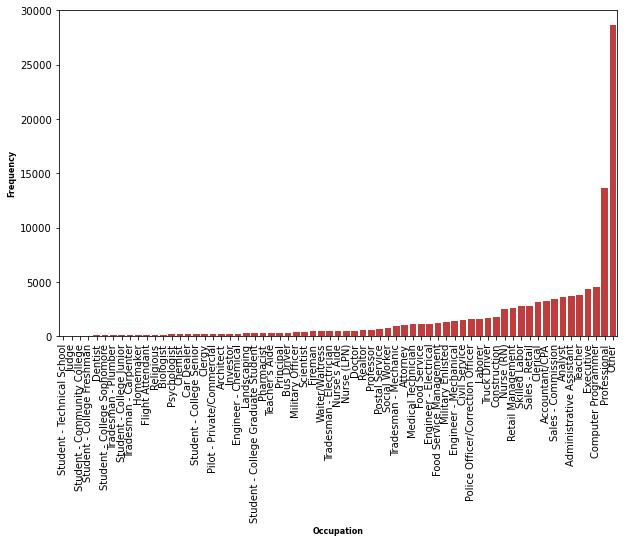

In [14]:
#distribution of Occupation
countplot(data, 'Occupation')
plt.xticks(rotation = 90);

## Observation

From the plot above we can see that the most occuring Occupation is other(people who didn't state their occupation). It is followed by those who state their occupation as being a proffesional. The other occupation's which occur frequently are computer programming and Executives. The other occupations occur very minimally.

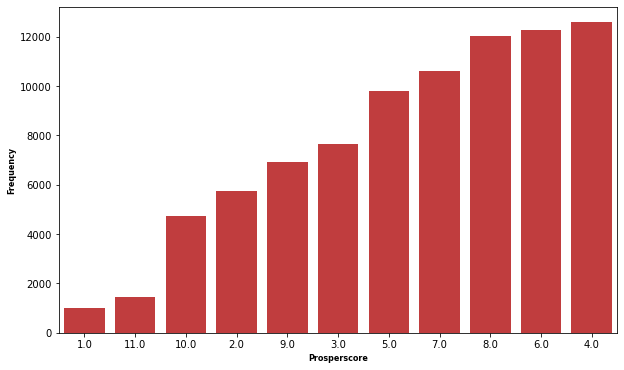

In [16]:
#Distribution of prosperscore
countplot(data, 'ProsperScore')

## Observation

From the plot above we can see that majority of borrowers have a prosper score of 4.0 which shows a very high frequency on the right end of the plot, this is closely followed by borrowers who have a prosper score of 6.0 and 8.0. The other prosper scores which occur frequently show a declining trend to the left of the plot in this order(7.0, 5.0, 3.0, 9.0, 2.0, 10.0, 11.0, and 1.0).

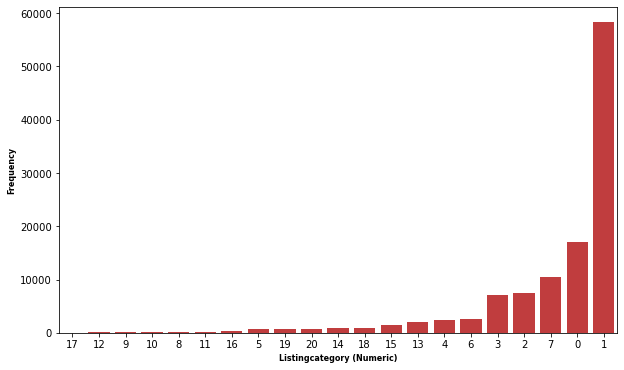

In [20]:
#Distribution of Listing category
countplot(data, 'ListingCategory (numeric)')

## Observation

From the plot above we can see that a very high majority of loans were in the ListingCategory of 1(occuring over 50,000 times). It is followed by 0, 7, 2, and 3 with the other listing category numbers occuring minimally.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of LoanStatus variable was heavily left skewed,
  The distribution of LoanOriginalAmount was heavily right skewed,
  The distribution of BorrowerAPR variable was largely unimodal,
  The distribution of IsBorrowerHomeOwner was largely evenly shared between the two categorical types,
  The distribution of EmploymentStatus was largely left skewed,
  The distribution of IncomeRange was largely left skewed,
  The distribution of term was left skewed,
  The distribution of Occupation was largely left skewed,
  The distribution of ProsperScore was largely left skewed,
  The distribution of ListingCategory was largely left skewed,
  The distribution of LenderYield was largely unimodal.
  
  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Of all the features I investigated, there were no unusual distributions. I performed some operations to tidy the data,fill in missing data and drop other rows with missing data in order to get better and more accurate visualizations.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> Examine to see if there are any relationships between my feature variables(loanOriginalamount, BorrowerAPR, Loanstatus) and other variables

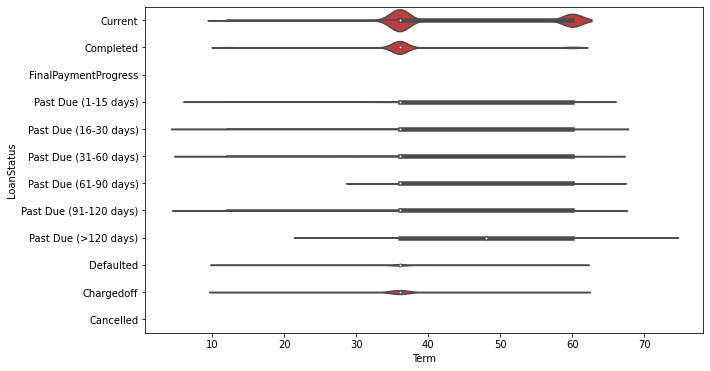

In [21]:
#check the relationship between LoanStatus and Term
plt.figure(figsize=(10, 6));
base_color = sb.color_palette()[3]
sb.violinplot(data=data, x='Term', y='LoanStatus', color= base_color, scale = 'count');

## Observation

From the plot above we can see that all the median of Term fall between 30 and 40 while the past due category of (> 120 days) has the most outliers. All the median are also aligned centrally indicating that term does not really affect loan status.

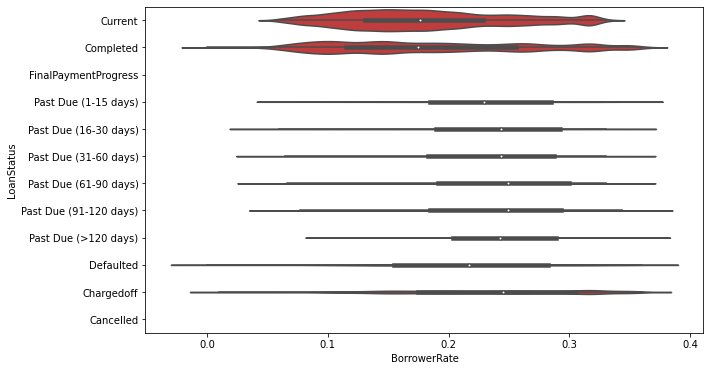

In [22]:
#check the relationship between BorrowerRate and LoanStatus
plt.figure(figsize=(10, 6));
base_color = sb.color_palette()[3]
sb.violinplot(data=data, x='BorrowerRate', y='LoanStatus', color = base_color, scale = 'count');

## Observation

From the plot above we can see that the defaulted Loan status category has slightly more outliers. Wee can also see that the median of
current and completed loans indicate lower Borrower rates than other loan status categories which have medians indicating higher
rates.

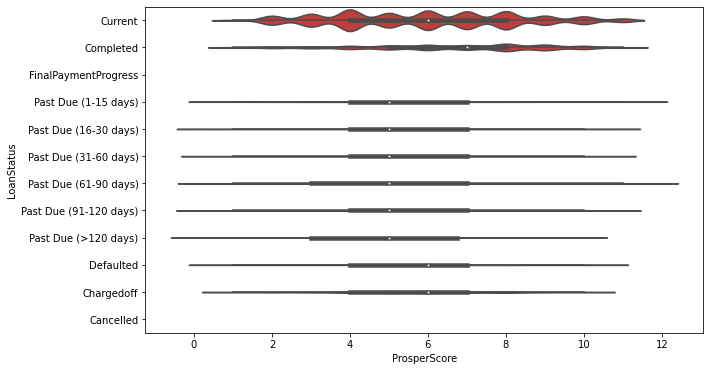

In [23]:
#check the relationship between ProsperScore and LoanStatus
plt.figure(figsize=(10, 6));
base_color = sb.color_palette()[3]
sb.violinplot(data=data, x='ProsperScore', y='LoanStatus', color = base_color, scale='count');

## Observation

From the plot above we can see that the median of loan status in the current category inidcates prosper scores of 6, The median of loan status in the category of completed also show the highest prosper scores between 6 and 8, indicating that people with higher prosper scores complete their loan payments more than people with lower scores.

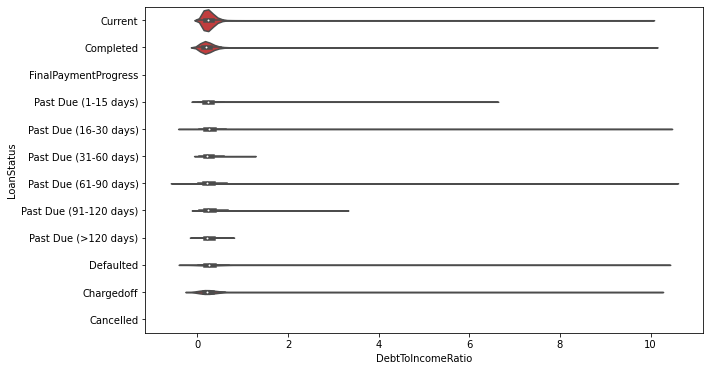

In [20]:
#Check the relationship between DebtToIncomeRatio and LoanStatus
plt.figure(figsize=(10, 6));
base_color = sb.color_palette()[3]
sb.violinplot(data=data, x='DebtToIncomeRatio', y='LoanStatus', color = base_color, scale = 'count');

## Observation

From the plot above we can see that the defaulted loan status category slighlty has more outliers. We can slo observe that the median of all loan status category are aligned in a straight line, indicating that debt to income ratio does not really affect
loan status.

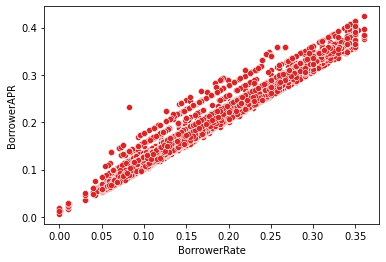

In [386]:
#check the relationship between BorroweRate and BorrowerAPR
base_color = sb.color_palette()[3]
data['BorrowerAPR'].nunique()
sb.scatterplot(data = data, x = 'BorrowerRate', y = 'BorrowerAPR', color = base_color);

## Observation

From the plot above we can see that there is a very strong positive correlation (relationship) between Borrower rate and Borrower APR. This indicates that loans with a high borrower rate will also include also high borrowerAPR.

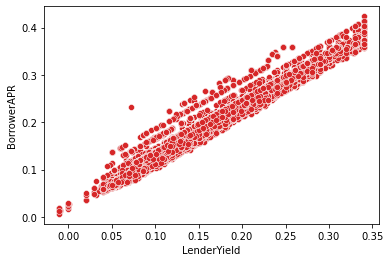

In [387]:
#Check the relationship between LenderYield and BorrowerAPR
base_color = sb.color_palette()[3]
sb.scatterplot(data = data, x = 'LenderYield', y = 'BorrowerAPR', color = base_color);

## Observation

From the plot above we can see that there is a very high positive correlation(relationship) between Borrowerapr and Lenderyield.
This indicates that loans where the borrower pay high interest will lead to the lender making more yield(profit) on the loan.

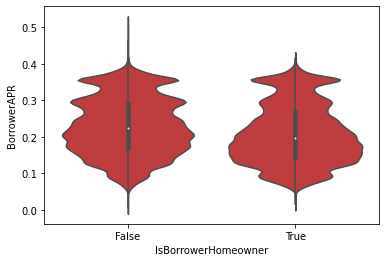

In [12]:
#Check the relationship between IsBorrowerHomeOwner and BorrowerAPR
base_color = sb.color_palette()[3]
sb.violinplot(data = data, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR', color = base_color, scale='count');

## Observation

From the plot above we can see that the median of the false category is higher than that of the True category. We can also see that the False category has alot more outliers than the True category.

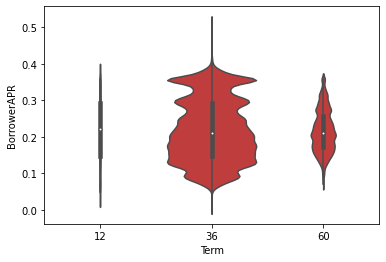

In [13]:
#check the relationship between Term and BorrowerAPR
base_color = sb.color_palette()[3]
sb.violinplot(data = data, x = 'Term', y = 'BorrowerAPR', color = base_color, scale = 'count');

## Observation

From the plot above we can the median of the 3 categories of term are fairly equal while we can also observe that the 36 category has alot more outliers with very high borrowerAPR than the other two categories.

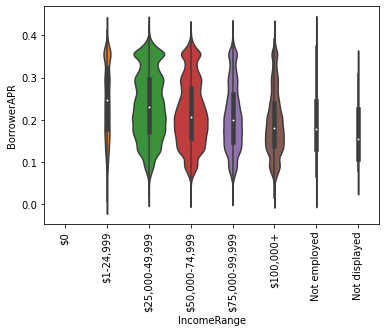

In [19]:
#check the relationship between IncomeRange and BorrowerAPR
sb.violinplot(data = data, x = 'IncomeRange', y = 'BorrowerAPR', scale = 'count');
plt.xticks(rotation = 90);

## Observation

From the plot above we can see that the income range of 1 - 24,999 has a higher median than the other categories of income ranges. We can also observe a progressive decrease in median starting from the 3rd category till the end(excluding the not displayed category)indicating that the lower income ranges have more borrowers who pay higher borrowerAPR than the higher income ranges.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I checked how different features affected my selected variables of interest. I noticed that being a homeowner slightly improved the borrower rates that borrowers got. Borrowers in the 100,000 and above income range got better interest rates than other income ranges. There is a positive corelation between borrower rate and borrower apr. There is also a positive relationship between Lender yield and borrower apr.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, I didn't observe any interesting realationships between the other features in the dataset.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

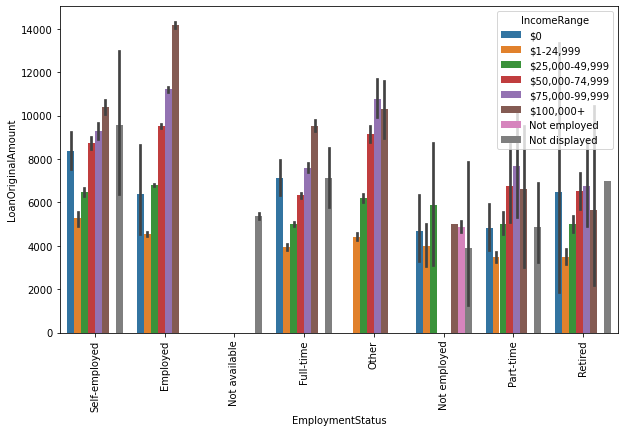

In [43]:
#check how LoanOriginalamount varies between Incomerange and Employment status
plt.figure(figsize=(10, 6));
sb.barplot(x='EmploymentStatus', y='LoanOriginalAmount', hue='IncomeRange', data=data);
plt.xticks(rotation = 90);

## Observation

From the plot above we can see that Employed people in the highest income range(100, 000 and above get the highest loans)

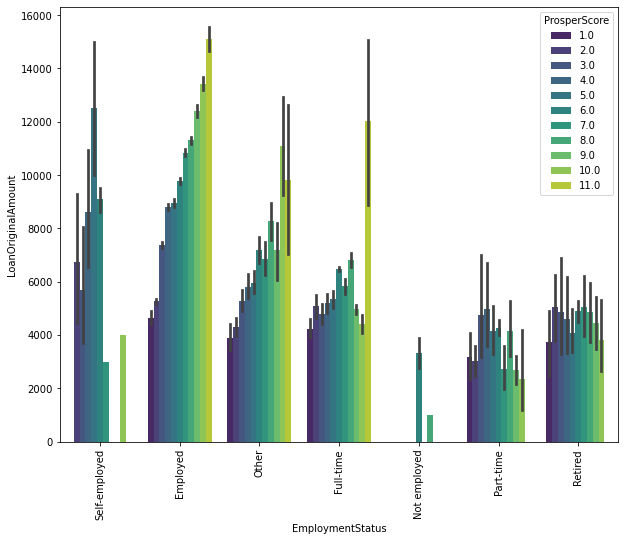

In [363]:
#check how prosper score and employment status affects loan original amount
plt.figure(figsize=(10, 8));
sb.barplot(x='EmploymentStatus', y='LoanOriginalAmount', hue='ProsperScore', data=data, palette = 'viridis');
plt.xticks(rotation = 90);

## Observation

From the plot above we can see that borrowers with higher prosper scores who are employed get the highest loan amounts.

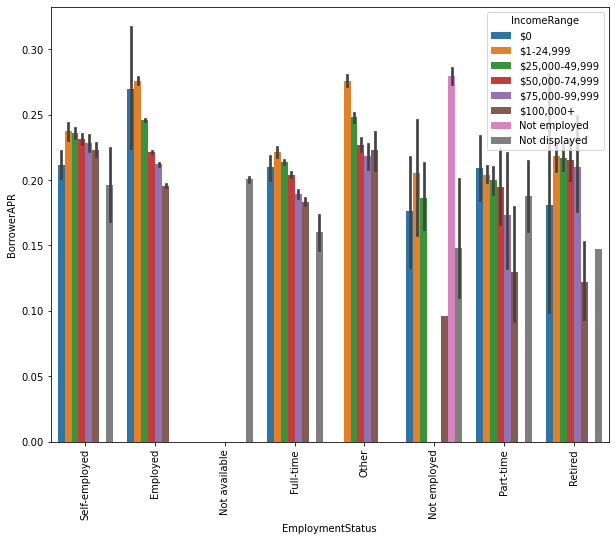

In [48]:
#check how borrowerapr changes according to income range and employment status
plt.figure(figsize=(10, 8));
sb.barplot(x='EmploymentStatus', y='BorrowerAPR', hue='IncomeRange', data=data);
plt.xticks(rotation = 90);

## Observation

From the plot above we can see that people in the lowest income ranges get higher interest rates because their loans are considered
more risky.

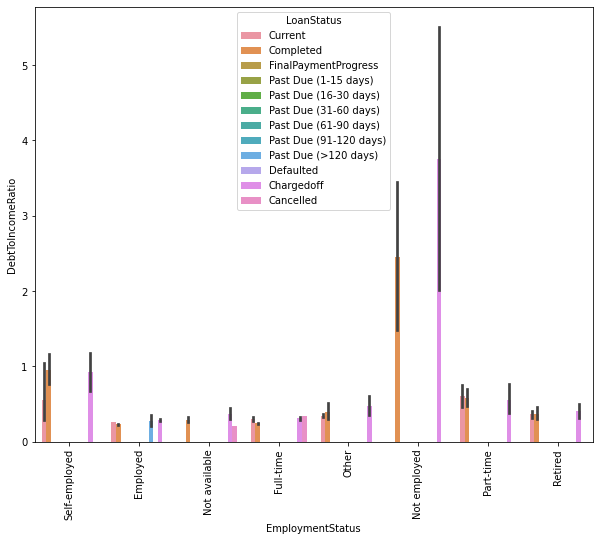

In [49]:
#check how debt to income ratio and employment status affects loan status
b_data = data[data["LoanStatus"].isin(['Completed','Current', 'Cancelled', 'Chargedoff','Past Due (>120 days)' ])]
plt.figure(figsize=(10, 8));
sb.barplot(x='EmploymentStatus', y='DebtToIncomeRatio', hue='LoanStatus', data=b_data);
plt.xticks(rotation = 90);

## Observation

From the plot above we can see that majority of people who are not employed have higher debt to income ratio and got more loans
charged off(written off as a loss by the borrowing company but the borrowers are still legally obligated to pay.)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I noticed that people who are in the lowest income range usually get higher loan rates as their loans are considered more risky.I also observed from my plots that regardless of your employment status, borrowers with higher prosper score and in the highest income ranges got higher loan amounts.

### Were there any interesting or surprising interactions between features?

> I didn't observe any interesting or surprising interaction between features.

## Conclusions
Majority of the variables I chose to focus on in this data set had heavily skewed distributions. I tried to find out what affected the loans that borrowers got, what affected the borrower apr and what affects the loan outcome status. I found out that people with higher prosper scores and in the highest income ranges usually got the biggest loans. People in the lowest income ranges usually got loans with higher interest rates as their loans where considered more of a risk.